First Problem - Exercise Recognition

In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import matplotlib.patches as patches

import xgboost as xgb

/home/pedro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
X_train = joblib.load("Data/Xtrain1.pkl")
Y_train = np.load('Data/Ytrain1.npy')
print(X_train.shape)
print(Y_train.shape)

(700, 2)
(700,)


In [3]:
print(X_train)

     Patient_Id                                  Skeleton_Features
158           8  [0.01672805172463768, -0.5662699523188407, 0.0...
500          12  [0.03123780159177354, -0.5718956396, 0.0479631...
396           6  [0.023674554394231464, -0.5588386275217391, 0....
155           8  [0.009414516641025642, -0.5693782186153847, 0....
321           3  [0.015847331331651126, -0.5660038876666666, 0....
..          ...                                                ...
71            4  [0.00865563444, -0.5576752849466667, 0.0242797...
106           6  [0.017996815525, -0.5546415622, 0.032668157291...
270          14  [-0.06093925460784313, -0.5421445670294118, -0...
435           8  [-0.009460545267441861, -0.5828924643604652, 0...
102           6  [0.014680226106557379, -0.5484173288196722, 0....

[700 rows x 2 columns]


In [4]:
patient_ids = X_train["Patient_Id"].values
X_train = np.vstack(X_train["Skeleton_Features"].values)

In [5]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)  
print("patient_ids shape:", patient_ids.shape) 

X_train shape: (700, 132)
Y_train shape: (700,)
patient_ids shape: (700,)


In [6]:
connections = {
    'trunk': [(11, 12), (11, 23), (12, 24), (23, 24)],
    'right_arm': [(12, 14), (14, 16), (22, 16), (20, 16), (20, 18), (18, 16)],
    'left_arm': [(11, 13), (13, 15), (21, 15), (15, 19), (19, 17), (17, 15)],
    'right_leg': [(23, 25), (25, 27), (27, 31), (31, 29), (29, 27)],
    'left_leg': [(24, 26), (26, 28), (28, 30), (30, 32), (28, 32)]
}

colors = {
    'trunk': 'blue',
    'right_arm': 'red',
    'left_arm': 'green',
    'right_leg': 'orange',
    'left_leg': 'purple'
}

head_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

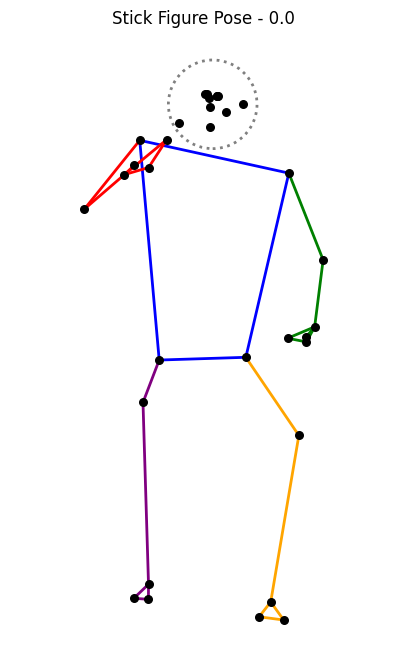

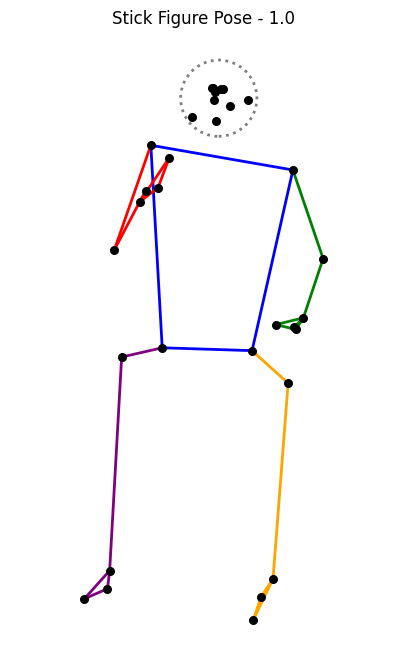

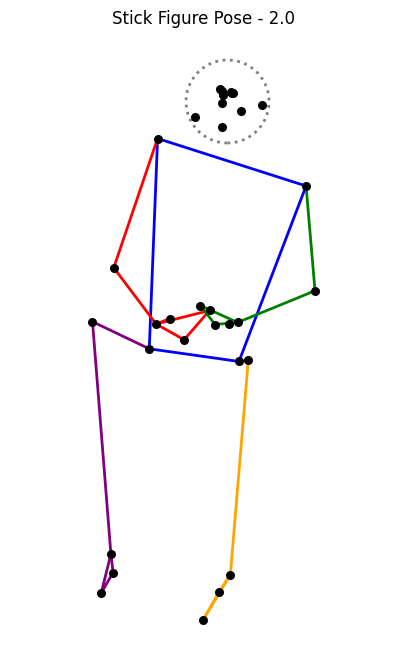

In [7]:
examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Split into mean and std
    mean_coords = sample[:66]
    std_coords = sample[66:]

    # Extract x and y of 33 keypoints
    x = mean_coords[0::2]  # even indices
    y = mean_coords[1::2]  # odd indices

    # Get head points
    head_x = x[head_indices]
    head_y = -y[head_indices]  # use -y if you invert y in your plot

    # Calculate center as mean of head points
    center_x = head_x.mean()
    center_y = head_y.mean()

    # Calculate radius as max distance from center to any head point
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15  # 1.15 for padding

    fig, ax = plt.subplots(figsize=(5, 8))

    # Plot segments
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # Plot joints
    ax.scatter(x, -y, c='black', s=30, zorder=2)

    # Draw head circle
    circle = patches.Circle((center_x, center_y), radius, fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()

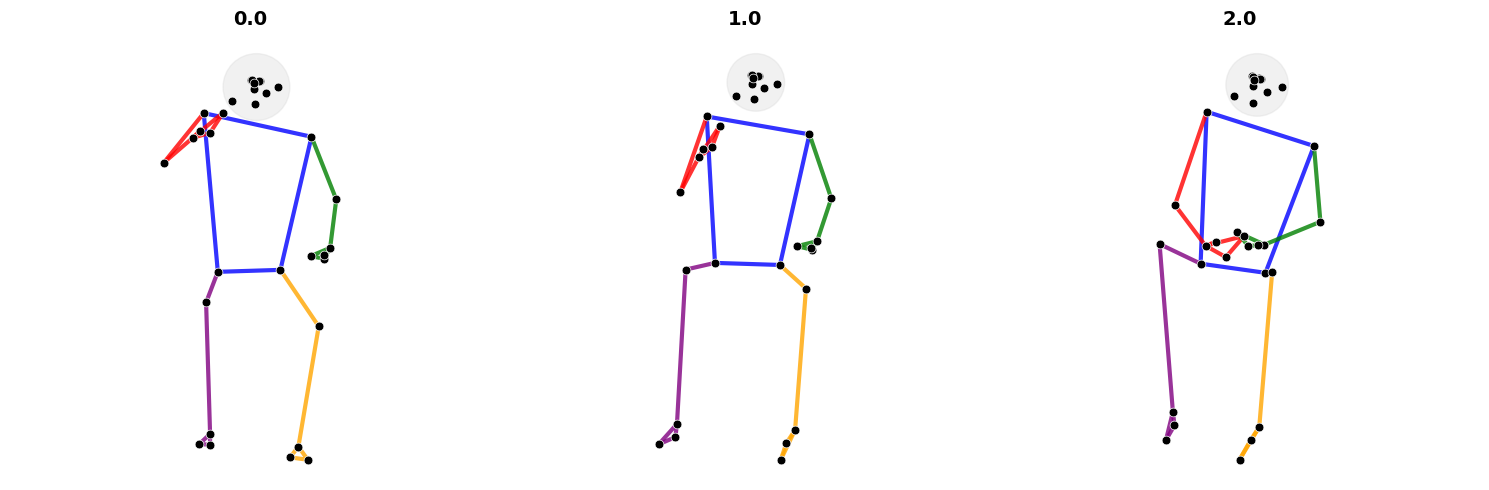

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_skeletons(samples, labels, connections, colors, head_indices, figsize=(12,5)):
    n = len(samples)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]  # garante lista mesmo para 1 figura

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        x = mean_coords[0::2]
        y = mean_coords[1::2]

        # Head circle
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.2

        # Plot segments com cores e transparência
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors.get(part,'#1f77b4'), lw=3, alpha=0.8)

        # Plot joints
        ax.scatter(x, -y, c='black', s=40, zorder=3, edgecolors='white', linewidth=0.5)

        # Head preenchida semi-transparente
        circle = patches.Circle((center_x, center_y), radius, fill=True, color='lightgray', alpha=0.3)
        ax.add_patch(circle)

        # Estilo do eixo
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('off')
        ax.set_facecolor('#f9f9f9')

    plt.tight_layout()
    plt.show()


examples = [0, 4, 10]
plot_skeletons(
    samples=[X_train[i] for i in examples],
    labels=[Y_train[i] for i in examples],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(15,5)
)


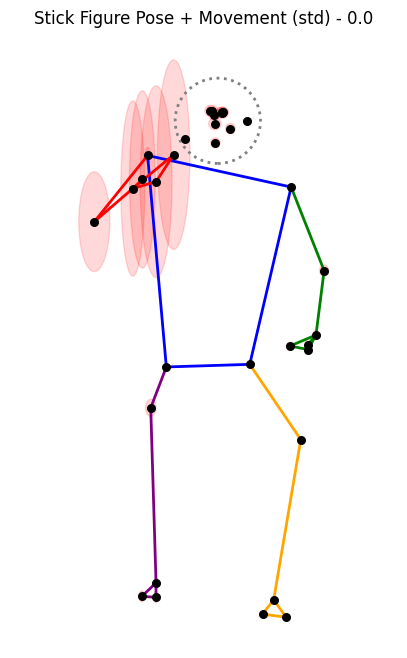

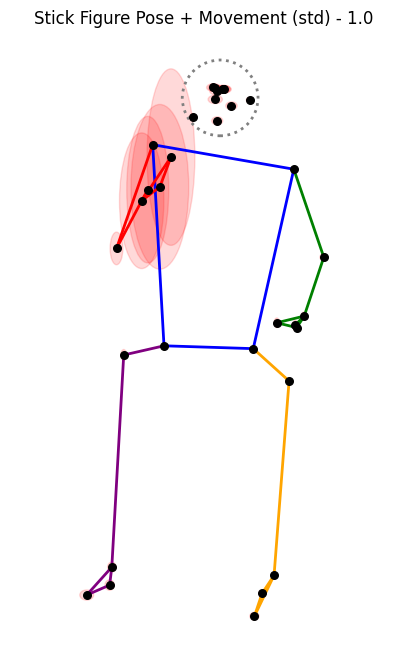

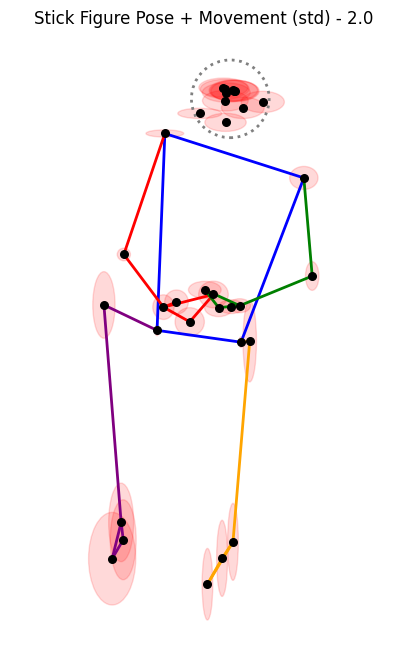

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

examples = [0, 4, 10]

for idx in examples:
    sample = X_train[idx]

    # Divide em média e desvio
    mean_coords = sample[:66]
    std_coords = sample[66:]

    x = mean_coords[0::2]
    y = mean_coords[1::2]
    x_std = std_coords[0::2]
    y_std = std_coords[1::2]

    # Calcular cabeça
    head_x = x[head_indices]
    head_y = -y[head_indices]
    center_x = head_x.mean()
    center_y = head_y.mean()
    radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

    fig, ax = plt.subplots(figsize=(5, 8))

    # --- Desenhar segmentos (mean) ---
    for part, segs in connections.items():
        for a, b in segs:
            ax.plot([x[a], x[b]], [-y[a], -y[b]], c=colors[part], lw=2)

    # --- Juntas principais ---
    ax.scatter(x, -y, c='black', s=30, zorder=3, label='Mean Position')

    # --- Desenhar elipses de incerteza (std) ---
    for i in range(len(x)):
        ellipse = patches.Ellipse(
            (x[i], -y[i]),            # centro
            width=x_std[i]*2,         # largura = 2*desvio
            height=y_std[i]*2,        # altura = 2*desvio
            edgecolor='red',
            facecolor='red',
            alpha=0.15,
            lw=1
        )
        ax.add_patch(ellipse)

    # --- Círculo da cabeça ---
    circle = patches.Circle((center_x, center_y), radius,
                            fill=False, linestyle='dotted', edgecolor='gray', lw=2)
    ax.add_patch(circle)

    ax.set_title(f"Stick Figure Pose + Movement (std) - {Y_train[idx]}")
    ax.axis('equal')
    ax.axis('off')
    plt.show()


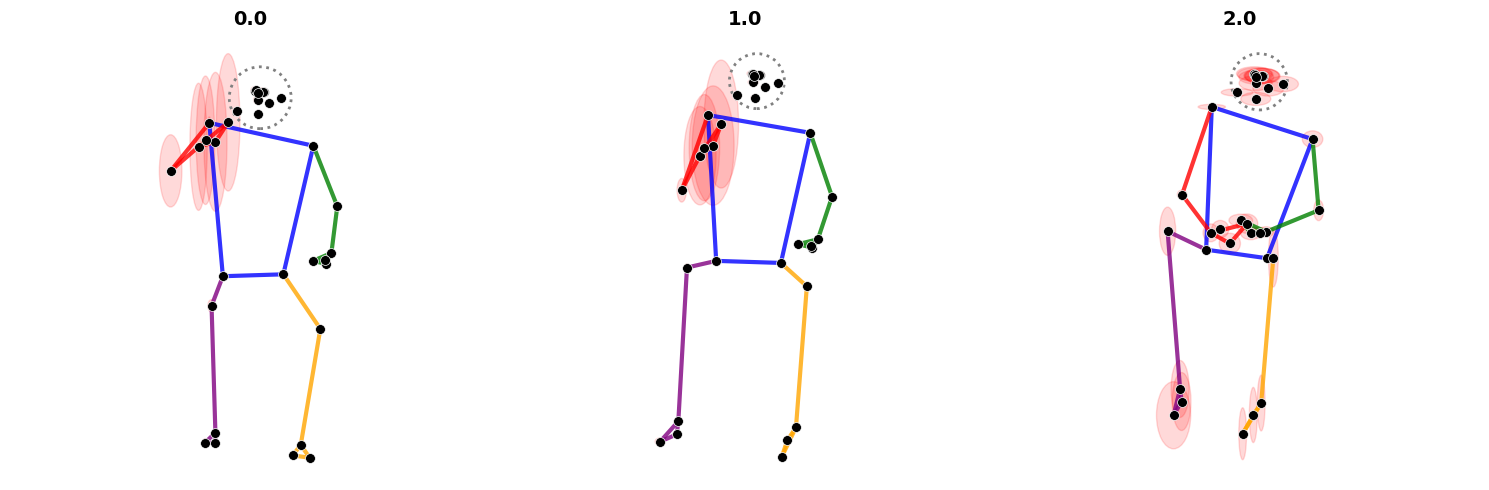

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_skeletons_mean_std(samples, labels, connections, colors, head_indices,
                            figsize=(15,5), alpha_std=0.2, joint_size=40, lw_seg=2):
    """
    Plota múltiplos skeletons lado a lado com posição média e elipses representando desvio padrão.

    Args:
        samples: lista de samples (1D, 132 features cada)
        labels: lista de labels correspondentes
        connections: dict de partes do corpo -> pares de keypoints
        colors: dict de cores por parte
        head_indices: lista de índices dos keypoints da cabeça
        figsize: tamanho da figura
        alpha_std: transparência das elipses de desvio
        joint_size: tamanho dos pontos das juntas
        lw_seg: largura das linhas dos segmentos
    """
    n = len(samples)
    fig, axes = plt.subplots(1, n, figsize=figsize)
    if n == 1:
        axes = [axes]

    for ax, sample, label in zip(axes, samples, labels):
        mean_coords = sample[:66]
        std_coords = sample[66:]

        x = mean_coords[0::2]
        y = mean_coords[1::2]
        x_std = std_coords[0::2]
        y_std = std_coords[1::2]

        # Círculo da cabeça
        head_x = x[head_indices]
        head_y = -y[head_indices]
        center_x, center_y = head_x.mean(), head_y.mean()
        radius = np.max(np.sqrt((head_x - center_x)**2 + (head_y - center_y)**2)) * 1.15

        # Fundo suave
        ax.set_facecolor('#f9f9f9')

        # --- Desenhar segmentos ---
        for part, segs in connections.items():
            for a, b in segs:
                ax.plot([x[a], x[b]], [-y[a], -y[b]],
                        c=colors.get(part,'#1f77b4'),
                        lw=lw_seg, alpha=0.8)

        # --- Juntas (mean) ---
        ax.scatter(x, -y, c='black', s=joint_size, zorder=3, edgecolors='white', linewidth=0.5)

        # --- Elipses de incerteza (std) ---
        for i in range(len(x)):
            ellipse = patches.Ellipse(
                (x[i], -y[i]),
                width=x_std[i]*2,
                height=y_std[i]*2,
                edgecolor='red',
                facecolor='red',
                alpha=alpha_std,
                lw=1
            )
            ax.add_patch(ellipse)

        # --- Círculo da cabeça ---
        circle = patches.Circle(
            (center_x, center_y),
            radius,
            fill=False,
            linestyle='dotted',
            edgecolor='gray',
            lw=2
        )
        ax.add_patch(circle)

        # --- Ajustes finais ---
        ax.set_title(f"{label}", fontsize=14, fontweight='bold')
        ax.axis('equal')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


# ---------------- Example usage ----------------
examples = [0, 4, 10]
plot_skeletons_mean_std(
    samples=[X_train[i] for i in examples],
    labels=[Y_train[i] for i in examples],
    connections=connections,
    colors=colors,
    head_indices=head_indices,
    figsize=(15,5),
    alpha_std=0.15,
    joint_size=50,
    lw_seg=3
)


In [13]:
K = 60
important_idx = indices[:K]
X_train_sel = X_train[:, important_idx]

In [16]:
important_keypoints = np.argsort(key_importances)[-15:]  # top 15 keypoints
selected_features = []
for k in important_keypoints:
    selected_features += [2*k, 2*k+1, 66 + 2*k, 66 + 2*k + 1]

X_train_sel = X_train[:, selected_features]


Train shape: (490, 132), Test shape: (210, 132)


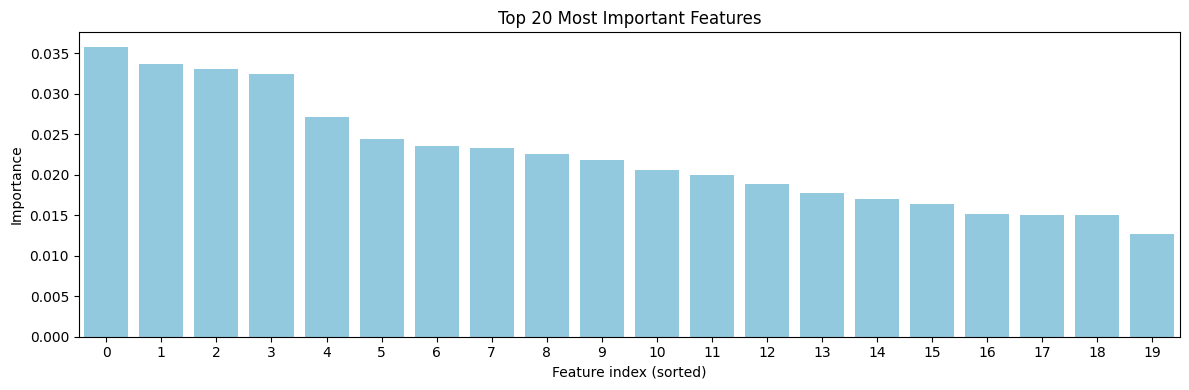

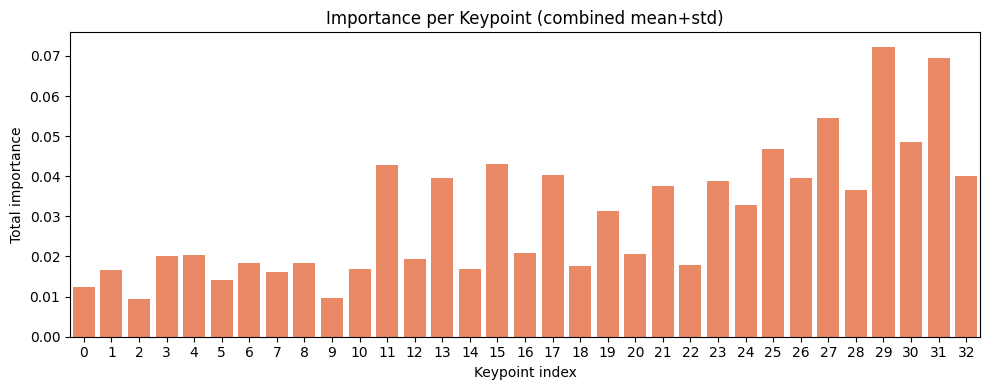

Selected 60 features from 132 total

✅ Train F1: 1.000
✅ Test  F1: 0.980


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# --- 1️⃣ Split data ---
X_train_1, X_test, Y_train_1, Y_test = train_test_split(
    X_train, Y_train, test_size=0.3, random_state=42, stratify=Y_train
)

print(f"Train shape: {X_train_1.shape}, Test shape: {X_test.shape}")

# --- 2️⃣ Baseline RandomForest ---
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_1, Y_train_1)

# --- 3️⃣ Feature importances ---
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# --- Plot top 20 features ---
plt.figure(figsize=(12,4))
sns.barplot(x=np.arange(20), y=importances[indices[:20]], color="skyblue")
plt.title("Top 20 Most Important Features")
plt.xlabel("Feature index (sorted)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# --- 4️⃣ Aggregate importance by keypoint (4 features per keypoint: mean_x, mean_y, std_x, std_y) ---
key_importances = []
for k in range(33):
    feat_idx = [2*k, 2*k+1, 66 + 2*k, 66 + 2*k + 1]
    key_importances.append(importances[feat_idx].sum())

plt.figure(figsize=(10,4))
sns.barplot(x=np.arange(33), y=key_importances, color="coral")
plt.title("Importance per Keypoint (combined mean+std)")
plt.xlabel("Keypoint index")
plt.ylabel("Total importance")
plt.tight_layout()
plt.show()

# --- 5️⃣ Select top 15 most important keypoints ---
important_keypoints = np.argsort(key_importances)[-15:]
selected_features = []
for k in important_keypoints:
    selected_features += [2*k, 2*k+1, 66 + 2*k, 66 + 2*k + 1]

X_train_sel = X_train_1[:, selected_features]
X_test_sel = X_test[:, selected_features]

print(f"Selected {len(selected_features)} features from {X_train_1.shape[1]} total")

# --- 6️⃣ Pipeline: scale + feature selection + final RF ---
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42),
                                 threshold="median")),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42))
])

pipe.fit(X_train_sel, Y_train_1)
train_f1 = f1_score(Y_train_1, pipe.predict(X_train_sel), average='macro')

test_f1 = f1_score(Y_test, pipe.predict(X_test_sel), average='macro')

print(f"\n✅ Train F1: {train_f1:.3f}")
print(f"✅ Test  F1: {test_f1:.3f}")


Original shape: (700, 132), with angles: (700, 133)
Train shape: (490, 133), Test shape: (210, 133)


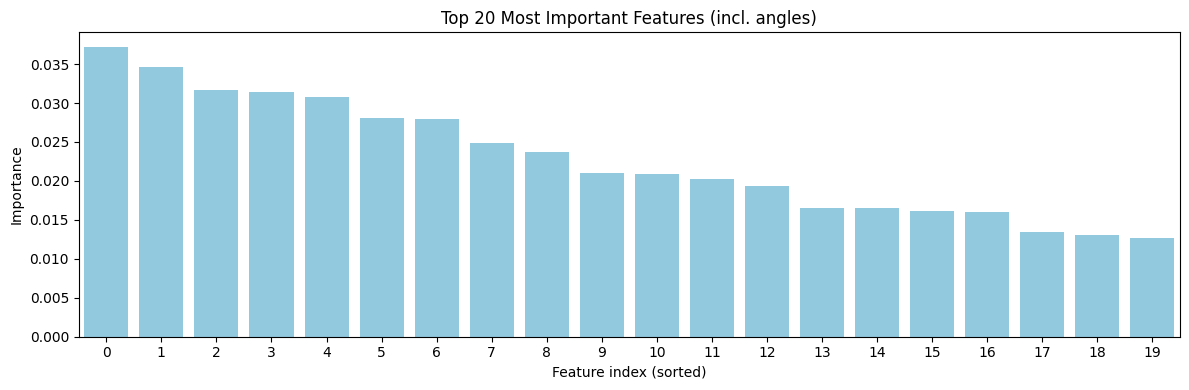

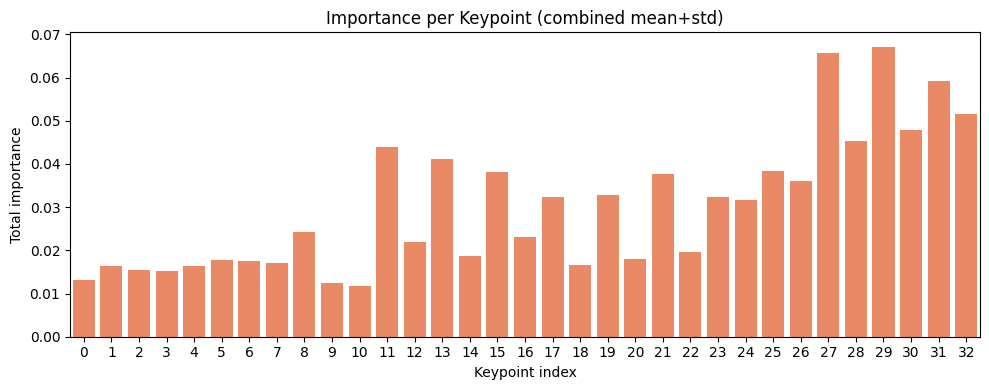

Selected 61 features from 133 total

✅ Train F1: 1.000
✅ Test  F1: 0.984


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# --- 🔧 Função para calcular ângulo entre 3 pontos ---
def calculate_angle(a, b, c):
    """Calcula o ângulo (em graus) formado por três pontos 2D: a-b-c"""
    ba = a - b
    bc = c - b
    cos_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc) + 1e-8)
    angle = np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))
    return angle

# --- 🧩 Função para extrair ângulos a partir das 33 keypoints ---
def compute_joint_angles(X):
    n_samples = X.shape[0]
    angles = np.zeros((n_samples, 1))  # vamos começar só com 1 ângulo
    for i in range(n_samples):
        sample = X[i]
        mean_coords = sample[:66]  # 33*2
        x = mean_coords[0::2]
        y = mean_coords[1::2]
        points = np.stack([x, y], axis=1)
        # ângulo do braço direito (12-14-16)
        angles[i, 0] = calculate_angle(points[12], points[14], points[16])
    return angles

# --- 0️⃣ Calcular ângulos e adicionar como novas features ---
angles = compute_joint_angles(X_train)
X_with_angles = np.hstack([X_train, angles])
print(f"Original shape: {X_train.shape}, with angles: {X_with_angles.shape}")

# --- 1️⃣ Split data ---
X_train_1, X_test, Y_train_1, Y_test = train_test_split(
    X_with_angles, Y_train, test_size=0.3, random_state=42, stratify=Y_train
)

print(f"Train shape: {X_train_1.shape}, Test shape: {X_test.shape}")

# --- 2️⃣ Baseline RandomForest ---
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_1, Y_train_1)

# --- 3️⃣ Feature importances ---
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# --- Plot top 20 features ---
plt.figure(figsize=(12,4))
sns.barplot(x=np.arange(20), y=importances[indices[:20]], color="skyblue")
plt.title("Top 20 Most Important Features (incl. angles)")
plt.xlabel("Feature index (sorted)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# --- 4️⃣ Aggregate importance by keypoint (4 features por keypoint) ---
key_importances = []
for k in range(33):
    feat_idx = [2*k, 2*k+1, 66 + 2*k, 66 + 2*k + 1]
    key_importances.append(importances[feat_idx].sum() if max(feat_idx) < len(importances) else 0)

plt.figure(figsize=(10,4))
sns.barplot(x=np.arange(33), y=key_importances, color="coral")
plt.title("Importance per Keypoint (combined mean+std)")
plt.xlabel("Keypoint index")
plt.ylabel("Total importance")
plt.tight_layout()
plt.show()

# --- 5️⃣ Select top 15 most important keypoints ---
important_keypoints = np.argsort(key_importances)[-15:]
selected_features = []
for k in important_keypoints:
    selected_features += [2*k, 2*k+1, 66 + 2*k, 66 + 2*k + 1]

# inclui também o novo ângulo
selected_features += [X_with_angles.shape[1] - 1]

X_train_sel = X_train_1[:, selected_features]
X_test_sel = X_test[:, selected_features]

print(f"Selected {len(selected_features)} features from {X_train_1.shape[1]} total")

# --- 6️⃣ Pipeline: scale + feature selection + final RF ---
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(RandomForestClassifier(n_estimators=200, random_state=42),
                                 threshold="median")),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42))
])

pipe.fit(X_train_sel, Y_train_1)
train_f1 = f1_score(Y_train_1, pipe.predict(X_train_sel), average='macro')
test_f1 = f1_score(Y_test, pipe.predict(X_test_sel), average='macro')

print(f"\n✅ Train F1: {train_f1:.3f}")
print(f"✅ Test  F1: {test_f1:.3f}")
